<h2> <b> Logistic Modeling of Economic Data: GDP and Trade of National Economies



```
Vraj Gandhi       - 202201425
Kaushik Prajapati - 202201472
```



<p align='justify'>
This notebook focuses on modeling the GDP and trade dynamics of six major economies: the USA, China, Japan, Germany, India, and the UK. Each country’s data includes annual GDP and trade values in USD, starting from 1960 (1970 for Germany). 

The dataset consists of `.txt` files containing time (year), GDP, and trade values for each country. For the USA, GDP and trade data are provided separately.

We refer to three research papers for modeling insights and forecasts. Based on these, our tasks include:
</p>

<ul>
  <li>Reproducing plots and tables from the referenced papers to validate the data and modeling techniques.</li>
  <li>Using parameters relevant to India to estimate when its GDP will reach $4 trillion and $5 trillion.</li>
  <li>Assuming exponential growth ($x = x_0 e^{at}$), forecasting India’s GDP in the year 2047.</li>
  <li>Summarizing three key conclusions drawn from the modeling exercise.</li>
</ul>


<h4> <b> Importing Libraries...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h4> <b> Some important functions

In [4]:
def logistic_function(xo, a, k, t):
    return (k * xo * np.exp(a * t)) / (xo * (np.exp(a * t) - 1) + k)

def power_law_function(x , k):
    return (1/x) - (1/k)

def power_law(u , beta):
    return u ** (beta)

def calc_mu(real, pred, n):
    return np.mean((real - pred) / pred)

def calc_std(real, pred, n):
    return np.std((real - pred) / pred)

def tnl(k, a, xo):
    return  np.log(k/xo - 1)/a

def pred_year(gdp_data,val):
    for i in range(0,100):
        if (gdp_data[i] >= val):
            return i

def exponential_function(xo,a,t):
    return xo*np.exp(a*t)

<h3> <b> USA GDP and Trade



In [5]:
usa_gdp_url = './data/US_GDP.txt'
usa_trade_url = './data/US_Trade.txt'

data = []
with open(usa_gdp_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])

usa_df_gdp = pd.DataFrame(data, columns = ['Year', 'GDP'])

data = []
with open(usa_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])

usa_df_trade = pd.DataFrame(data, columns = ['Year', 'Trade'])
# display(df_gdp)
# display(df_trade)

usa_time = usa_df_gdp['Year']
usa_GDP = usa_df_gdp['GDP']
usa_Trade = usa_df_trade['Trade']

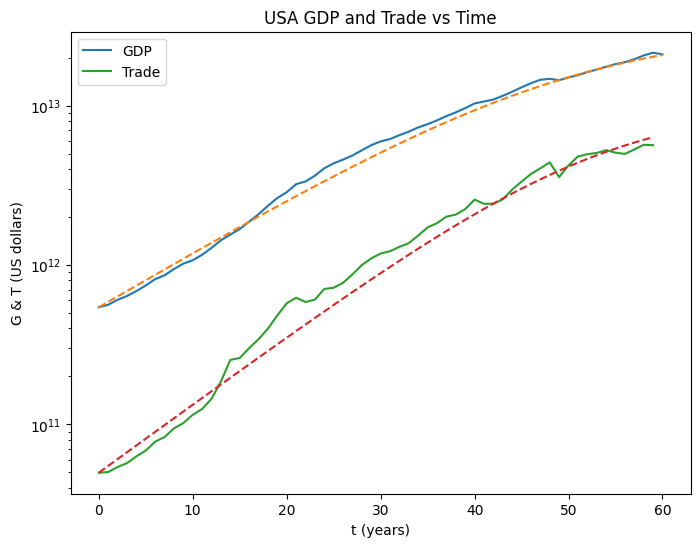

In [6]:
usa_gdp_logistic = logistic_function(xo = 5.43e+11, a = 0.080, k = 30e12, t = usa_time)
usa_trade_logistic = logistic_function(xo = 4.98e+10, a = 0.099, k = 10e12, t = usa_time[:-1])

plt.figure(figsize=(8, 6))
plt.plot(usa_time, usa_GDP, label='GDP')
plt.plot(usa_time, usa_gdp_logistic, '--')
plt.plot(usa_time[:-1], usa_Trade, label='Trade')
plt.plot(usa_time[:-1], usa_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('USA GDP and Trade vs Time')
plt.show()

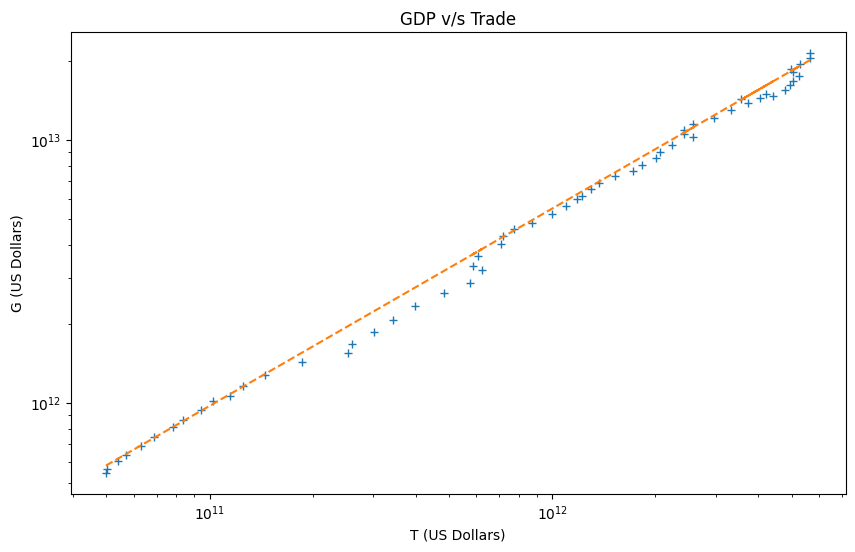

In [7]:
usa_G_val = power_law(usa_Trade , 0.75)

plt.figure(figsize=(10, 6))
plt.plot(usa_Trade, usa_GDP[:-1],'+')
plt.plot(usa_Trade, 5.5e3 * usa_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [8]:
usa_mu_gdp = calc_mu(real = usa_GDP, pred = usa_gdp_logistic, n = len(usa_GDP))
usa_std_gdp = calc_std(real = usa_GDP, pred = usa_gdp_logistic, n = len(usa_GDP))

usa_mu_trade = calc_mu(real = usa_Trade, pred = usa_trade_logistic, n = len(usa_Trade))
usa_std_trade = calc_std(real = usa_Trade, pred = usa_trade_logistic, n = len(usa_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(usa_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(usa_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(usa_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(usa_std_trade, 6)}')

Relative mean of GDP mu_GDP = 0.04922
Relative Standard Deviation of GDP std_GDP = 0.086612
Relative mean of Trade mu_Trade = 0.12001
Relative Standard Deviation of Trade std_Trade = 0.203252


<h3> <b> China GDP and Trade



In [9]:
china_gdp_trade_url = './data/China_GDP_Trade.txt'

data = []
with open(china_gdp_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])

df_china = pd.DataFrame(data, columns = ['Year', 'GDP', 'Trade'])
# display(df_china)
china_time = df_china['Year']
china_GDP = df_china['GDP']
china_Trade = df_china['Trade']

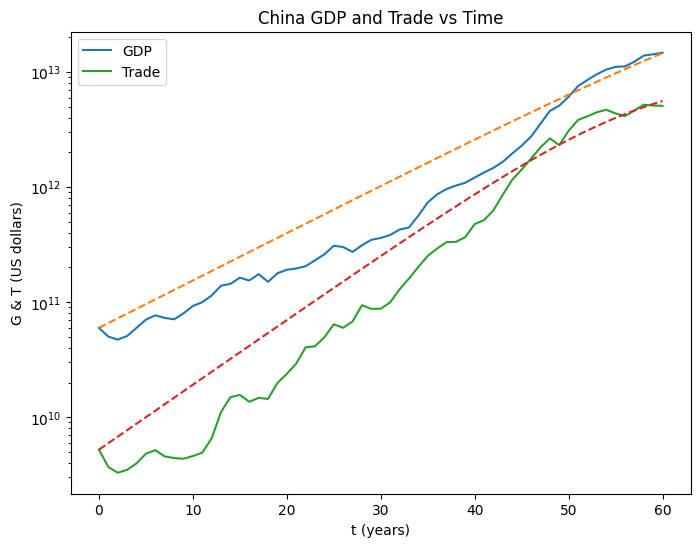

In [10]:
china_gdp_logistic = logistic_function(xo = 5.97e+10, a = 0.095, k = 80e12, t = china_time)
china_trade_logistic = logistic_function(xo = 5.215696e+09, a = 0.13, k = 10e12, t = china_time)

plt.figure(figsize=(8, 6))
plt.plot(china_time, china_GDP, label='GDP')
plt.plot(china_time, china_gdp_logistic, '--')
plt.plot(china_time, china_Trade, label='Trade')
plt.plot(china_time, china_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('China GDP and Trade vs Time')
plt.show()

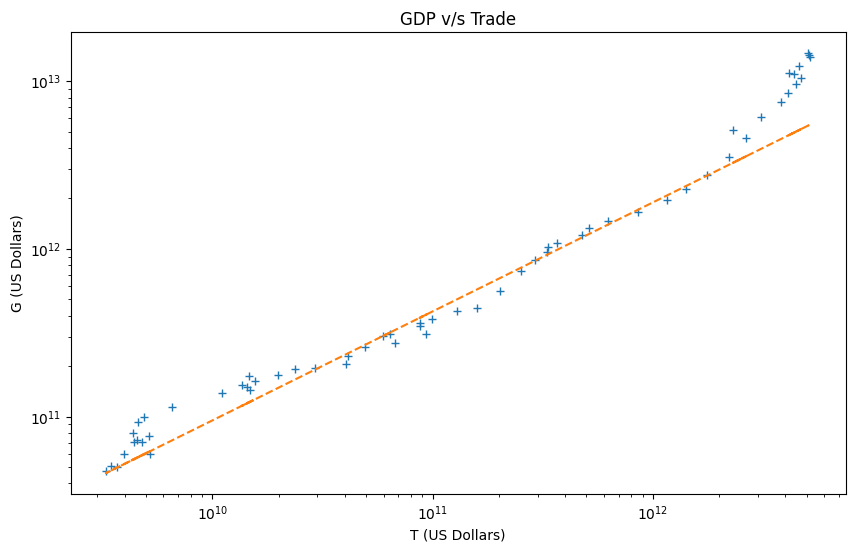

In [11]:
china_G_val = power_law(china_Trade , 0.65)

plt.figure(figsize=(10, 6))
plt.plot(china_Trade, china_GDP,'+')
plt.plot(china_Trade,  3e4 * china_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [12]:
china_mu_gdp = calc_mu(real = china_GDP, pred = china_gdp_logistic, n = len(china_GDP))
china_std_gdp = calc_std(real = china_GDP, pred = china_gdp_logistic, n = len(china_GDP))

china_mu_trade = calc_mu(real = china_Trade, pred = china_trade_logistic, n = len(china_Trade))
china_std_trade = calc_std(real = china_Trade, pred = china_trade_logistic, n = len(china_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(china_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(china_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(china_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(china_std_trade, 6)}')

Relative mean of GDP mu_GDP = -0.356831
Relative Standard Deviation of GDP std_GDP = 0.248342
Relative mean of Trade mu_Trade = -0.379053
Relative Standard Deviation of Trade std_Trade = 0.328575


<h3> <b> Japan GDP and Trade



In [13]:
japan_gdp_trade_url = './data/Japan_GDP_Trade.txt'

data = []
with open(japan_gdp_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])

df_japan = pd.DataFrame(data, columns = ['Year', 'GDP', 'Trade'])
# display(df_japan)
japan_time = df_japan['Year']
japan_GDP = df_japan['GDP']
japan_Trade = df_japan['Trade']

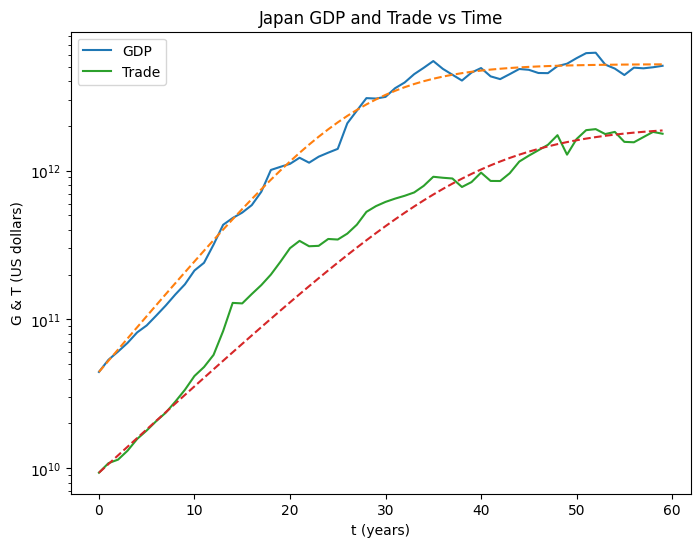

In [14]:
japan_gdp_logistic = logistic_function(xo = 4.43e+10, a = 0.175, k = 5.2e12, t = japan_time)
japan_trade_logistic = logistic_function(xo = 9.31e+09, a = 0.135, k = 2e12, t = japan_time)

plt.figure(figsize=(8, 6))
plt.plot(japan_time, japan_GDP, label='GDP')
plt.plot(japan_time, japan_gdp_logistic, '--')
plt.plot(japan_time, japan_Trade, label='Trade')
plt.plot(japan_time, japan_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('Japan GDP and Trade vs Time')
plt.show()

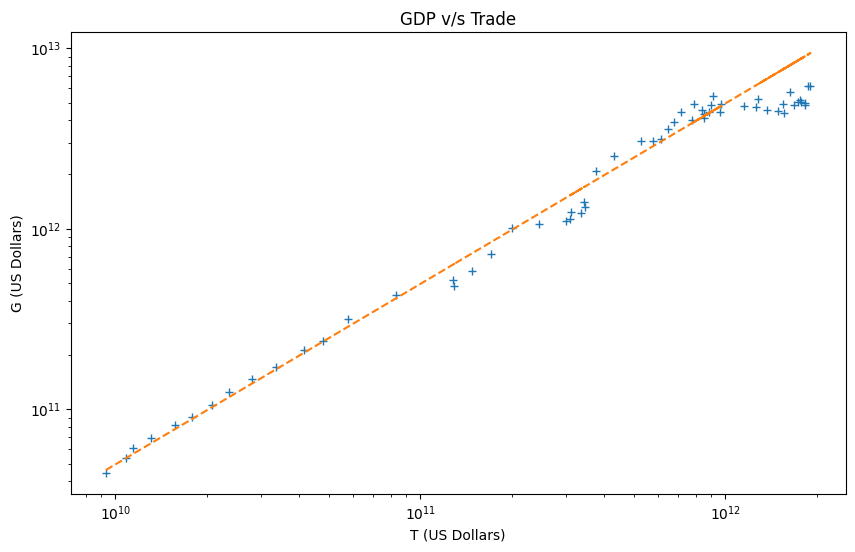

In [15]:
japan_G_val = power_law(japan_Trade , 1)

plt.figure(figsize=(10, 6))
plt.plot(japan_Trade, japan_GDP,'+')
plt.plot(japan_Trade, 4.95 * japan_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [16]:
japan_mu_gdp = calc_mu(real = japan_GDP, pred = japan_gdp_logistic, n = len(japan_GDP))
japan_std_gdp = calc_std(real = japan_GDP, pred = japan_gdp_logistic, n = len(japan_GDP))

japan_mu_trade = calc_mu(real = japan_Trade, pred = japan_trade_logistic, n = len(japan_Trade))
japan_std_trade = calc_std(real = japan_Trade, pred = japan_trade_logistic, n = len(japan_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(japan_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(japan_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(japan_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(japan_std_trade, 6)}')

Relative mean of GDP mu_GDP = -0.033641
Relative Standard Deviation of GDP std_GDP = 0.125207
Relative mean of Trade mu_Trade = 0.252728
Relative Standard Deviation of Trade std_Trade = 0.401554


<h3> <b> Germany GDP and Trade



In [17]:
germany_gdp_trade_url = './data/Germany_GDP_Trade.txt'

data = []
with open(germany_gdp_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])

df_germany = pd.DataFrame(data, columns = ['Year', 'GDP', 'Trade'])
# display(df_germany)
germany_time = df_germany['Year']
germany_GDP = df_germany['GDP']
germany_Trade = df_germany['Trade']

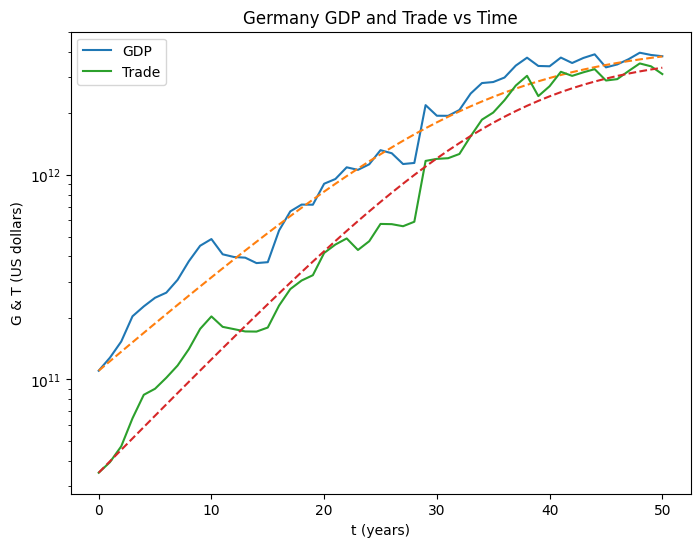

In [18]:
germany_gdp_logistic = logistic_function(xo = 1.103548e+11, a = 0.11, k = 4.4e12, t = germany_time)
germany_trade_logistic = logistic_function(xo = 3.499428e+10, a = 0.13, k = 3.9e12, t = germany_time)
plt.figure(figsize=(8, 6))
plt.plot(germany_time, germany_GDP, label='GDP')
plt.plot(germany_time, germany_gdp_logistic, '--')
plt.plot(germany_time, germany_Trade, label='Trade')
plt.plot(germany_time, germany_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('Germany GDP and Trade vs Time')
plt.show()

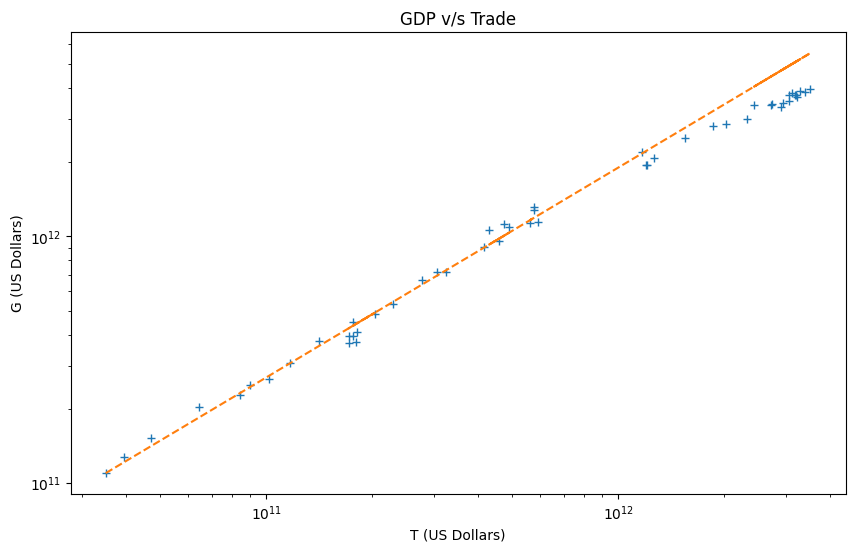

In [19]:
germany_G_val = power_law(germany_Trade , 0.85)

plt.figure(figsize=(10, 6))
plt.plot(germany_Trade, germany_GDP,'+')
plt.plot(germany_Trade, 1.2e2 * germany_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [20]:
germany_mu_gdp = calc_mu(real = germany_GDP, pred = germany_gdp_logistic, n = len(germany_GDP))
germany_std_gdp = calc_std(real = germany_GDP, pred = germany_gdp_logistic, n = len(germany_GDP))

germany_mu_trade = calc_mu(real = germany_Trade, pred = germany_trade_logistic, n = len(germany_Trade))
germany_std_trade = calc_std(real = germany_Trade, pred = germany_trade_logistic, n = len(germany_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(germany_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(germany_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(germany_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(germany_std_trade, 6)}')

Relative mean of GDP mu_GDP = 0.107963
Relative Standard Deviation of GDP std_GDP = 0.18553
Relative mean of Trade mu_Trade = 0.056289
Relative Standard Deviation of Trade std_Trade = 0.233909


<h3> <b> UK GDP and Trade



In [21]:
uk_gdp_trade_url = './data/UK_GDP_Trade.txt'

data = []
with open(uk_gdp_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])

df_uk = pd.DataFrame(data, columns = ['Year', 'GDP', 'Trade'])
# display(df_uk)
uk_time = df_uk['Year']
uk_GDP = df_uk['GDP']
uk_Trade = df_uk['Trade']

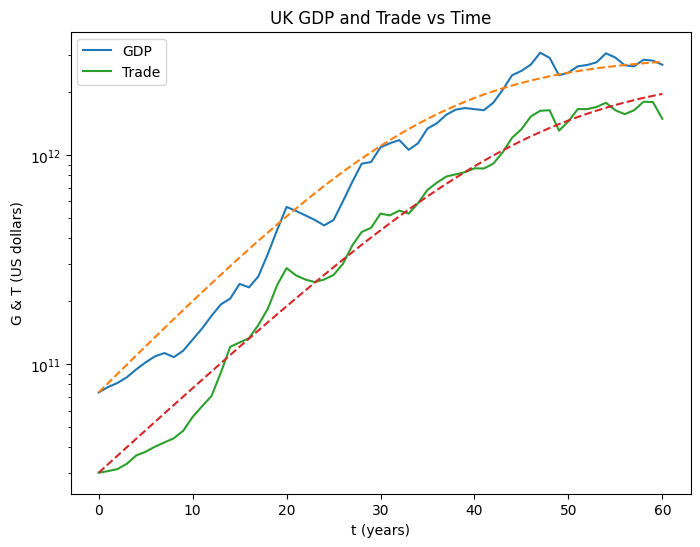

In [22]:
uk_gdp_logistic = logistic_function(xo = 7.323397e+10, a = 0.105, k = 3e12, t = uk_time)
uk_trade_logistic = logistic_function(xo = 3.023359e+10, a = 0.095, k = 2.5e12, t = uk_time)
plt.figure(figsize=(8, 6))
plt.plot(uk_time, uk_GDP, label='GDP')
plt.plot(uk_time, uk_gdp_logistic, '--')
plt.plot(uk_time, uk_Trade, label='Trade')
plt.plot(uk_time, uk_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('UK GDP and Trade vs Time')
plt.show()

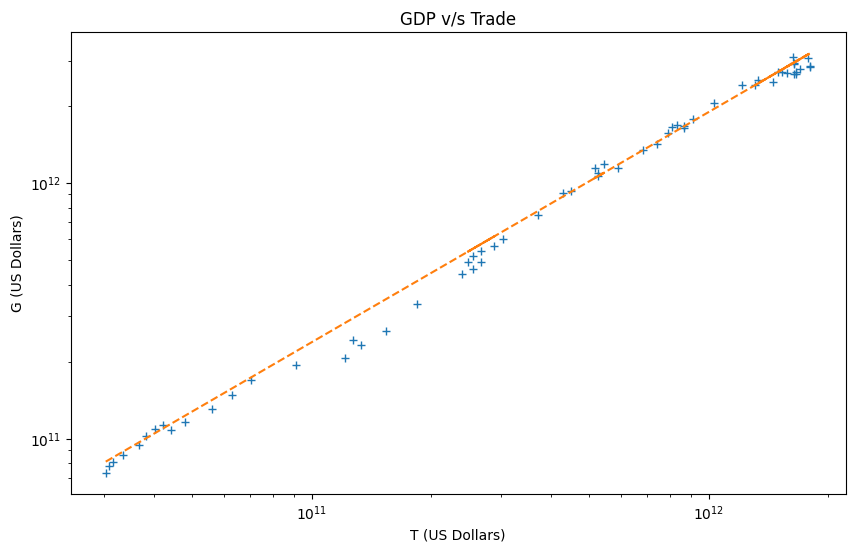

In [23]:
uk_G_val = power_law(uk_Trade , 0.9)

plt.figure(figsize=(10, 6))
plt.plot(uk_Trade, uk_GDP,'+')
plt.plot(uk_Trade, 30 * uk_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [24]:
uk_mu_gdp = calc_mu(real = uk_GDP, pred = uk_gdp_logistic, n = len(uk_GDP))
uk_std_gdp = calc_std(real = uk_GDP, pred = uk_gdp_logistic, n = len(uk_GDP))

uk_mu_trade = calc_mu(real = uk_Trade, pred = uk_trade_logistic, n = len(uk_Trade))
uk_std_trade = calc_std(real = uk_Trade, pred = uk_trade_logistic, n = len(uk_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(uk_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(uk_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(uk_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(uk_std_trade, 6)}')

Relative mean of GDP mu_GDP = -0.097231
Relative Standard Deviation of GDP std_GDP = 0.16097
Relative mean of Trade mu_Trade = -0.000398
Relative Standard Deviation of Trade std_Trade = 0.165624


<h3> <b> India GDP and Trade



In [25]:
india_gdp_trade_url = './data/India_GDP_Trade.txt'

data = []
with open(india_gdp_trade_url, 'r') as f:
    lines = f.readlines()
    lines = [line.strip() for line in lines]
    for line in lines:
        data.append(line.split())
        for i in range(len(data)):
            data[i][0] = float(data[i][0])
            data[i][1] = float(data[i][1])
            data[i][2] = float(data[i][2])

df_india = pd.DataFrame(data, columns = ['Year', 'GDP', 'Trade'])
# display(df_india)GDP Comparision
india_time = df_india['Year']
india_GDP = df_india['GDP']
india_Trade = df_india['Trade']

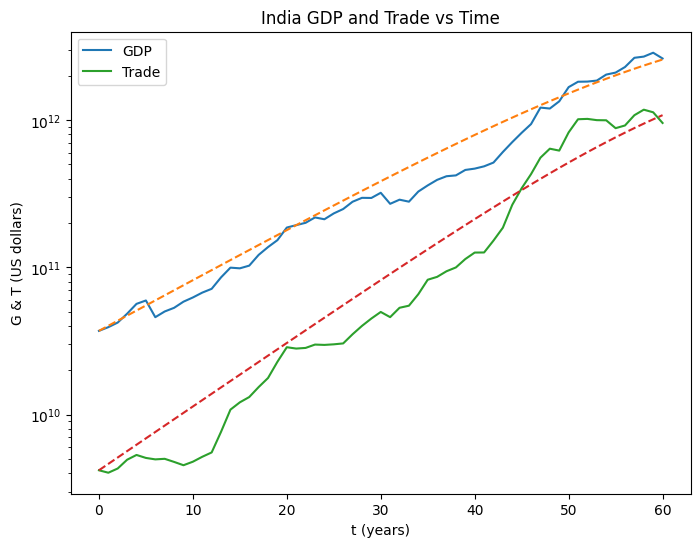

In [26]:
india_gdp_logistic = logistic_function(xo = 3.702988e+10, a = 0.080, k = 6e12, t = india_time)
india_trade_logistic = logistic_function(xo = 4.183204e+09, a = 0.100, k = 3e12, t = india_time)
plt.figure(figsize=(8, 6))
plt.plot(india_time, india_GDP, label='GDP')
plt.plot(india_time, india_gdp_logistic, '--')
plt.plot(india_time, india_Trade, label='Trade')
plt.plot(india_time, india_trade_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('India GDP and Trade vs Time')
plt.show()

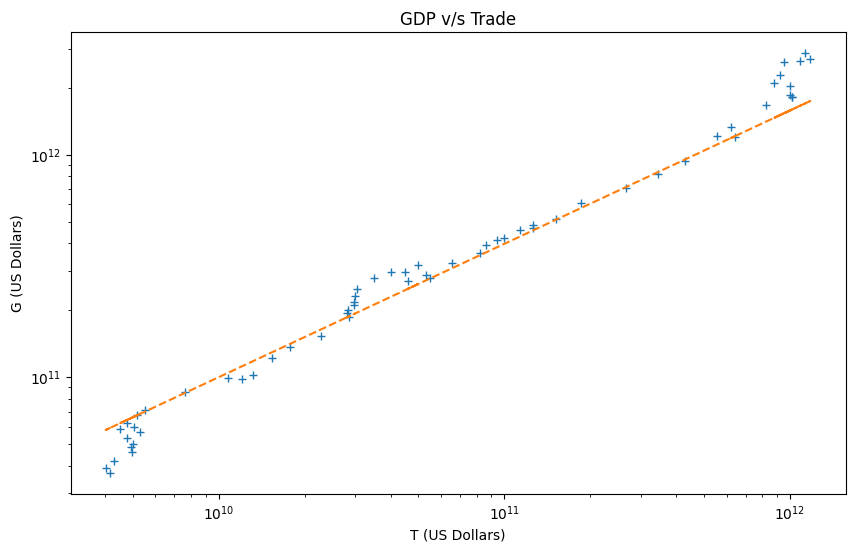

In [27]:
india_G_val = power_law(india_Trade , 0.6)

plt.figure(figsize=(10, 6))
plt.plot(india_Trade, india_GDP,'+')
plt.plot(india_Trade, 1e5 * india_G_val, '--')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('G (US Dollars)')
plt.xlabel('T (US Dollars)')
plt.title('GDP v/s Trade')
plt.show()

In [28]:
india_mu_gdp = calc_mu(real = india_GDP, pred = india_gdp_logistic, n = len(india_GDP))
india_std_gdp = calc_std(real = india_GDP, pred = india_gdp_logistic, n = len(india_GDP))

india_mu_trade = calc_mu(real = india_Trade, pred = india_trade_logistic, n = len(india_Trade))
india_std_trade = calc_std(real = india_Trade, pred = india_trade_logistic, n = len(india_Trade))

print(f'Relative mean of GDP mu_GDP = {np.round(india_mu_gdp, 6)}')
print(f'Relative Standard Deviation of GDP std_GDP = {np.round(india_std_gdp, 6)}')
print(f'Relative mean of Trade mu_Trade = {np.round(india_mu_trade, 6)}')
print(f'Relative Standard Deviation of Trade std_Trade = {np.round(india_std_trade, 6)}')

Relative mean of GDP mu_GDP = -0.136483
Relative Standard Deviation of GDP std_GDP = 0.172744
Relative mean of Trade mu_Trade = -0.178285
Relative Standard Deviation of Trade std_Trade = 0.345566


<h2> <b> GDP and Trade Comparisons: </b> </h2>
<h3> <b> 1. USA v/s China </b> </h2>



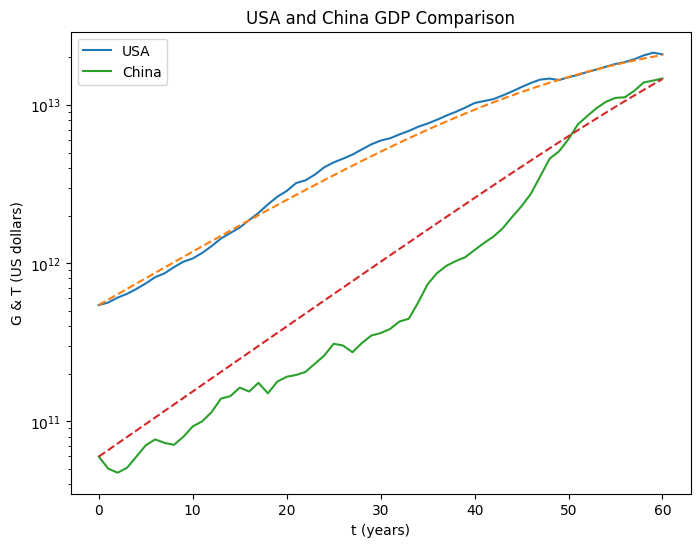

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(usa_time, usa_GDP, label='USA')
plt.plot(usa_time, usa_gdp_logistic, '--')
plt.plot(china_time, china_GDP, label='China')
plt.plot(china_time, china_gdp_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('USA and China GDP Comparison')
plt.show()

<h3> <b> 2. Japan v/s India

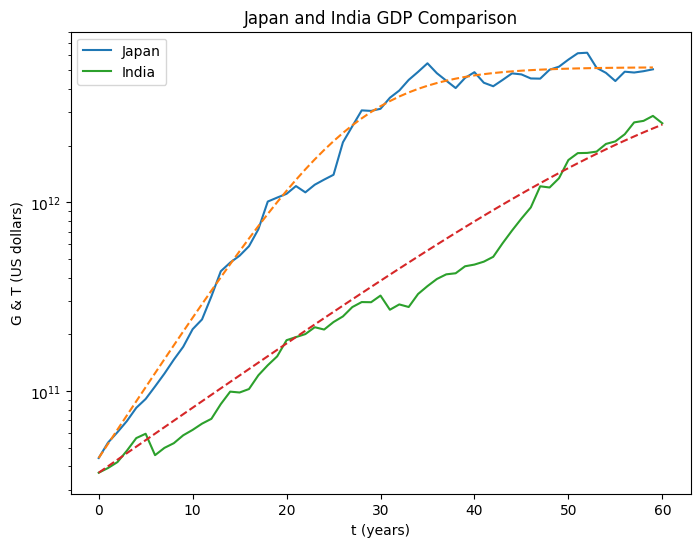

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(japan_time, japan_GDP, label='Japan')
plt.plot(japan_time, japan_gdp_logistic, '--')
plt.plot(india_time, india_GDP, label='India')
plt.plot(india_time, india_gdp_logistic, '--')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.title('Japan and India GDP Comparison')
plt.show()

<h3> <b> 3. Germany v/s UK

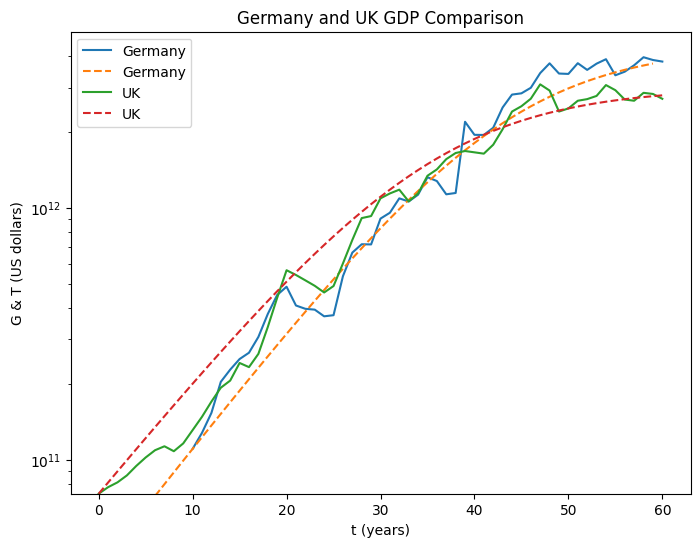

In [31]:
plt.figure(figsize=(8, 6))
germany_time_new = np.array([i for i in range(-10, 50)])
germany_gdp_logistic_new = logistic_function(xo = 1.103548e+11, a = 0.11, k = 4.4e12, t = germany_time_new)
plt.plot(germany_time + 10, germany_GDP, label='Germany')
plt.plot(germany_time_new + 10, germany_gdp_logistic_new, '--', label='Germany')
plt.plot(uk_time, uk_GDP, label='UK')
plt.plot(uk_time, uk_gdp_logistic, '--', label='UK')
plt.legend()
plt.yscale('log')
plt.ylabel('G & T (US dollars)')
plt.xlabel('t (years)')
plt.ylim(uk_gdp_logistic[0])
plt.title('Germany and UK GDP Comparison')
plt.show()

<h3> <b> 4. All countries GDP Predictions

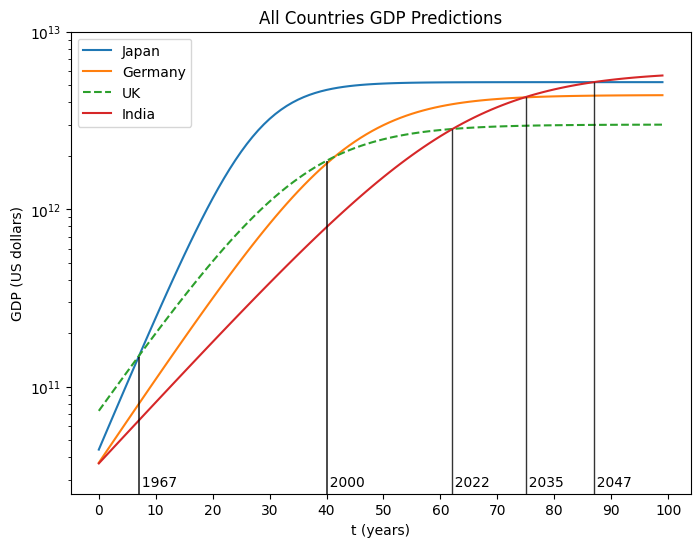

In [32]:
time = np.array([i for i in range(0, 100)])
time_g = np.array([i for i in range(-10, 90)])

# usa_gdp_logistic = logistic_function(xo = 5.43e+11, a = 0.080, k = 30e12, t = time)
# china_gdp_logistic = logistic_function(xo = 5.97e+10, a = 0.095, k = 80e12, t = time)
japan_gdp_logistic = logistic_function(xo = 4.43e+10, a = 0.175, k = 5.2e12, t = time)
germany_gdp_logistic = logistic_function(xo = 1.103548e+11, a = 0.11, k = 4.4e12, t = time_g)
uk_gdp_logistic = logistic_function(xo = 7.323397e+10, a = 0.105, k = 3e12, t = time)
india_gdp_logistic = logistic_function(xo = 3.702988e+10, a = 0.080, k = 6e12, t = time)

plt.figure(figsize=(8, 6))
# plt.plot(time, usa_gdp_logistic, '--')
# plt.plot(time, china_gdp_logistic, '--')
plt.plot(time, japan_gdp_logistic)
plt.plot(time_g + 10, germany_gdp_logistic)
plt.plot(time, uk_gdp_logistic, '--')
plt.plot(time, india_gdp_logistic)
plt.legend(['Japan', 'Germany', 'UK', 'India'])
plt.yscale('log')
plt.ylabel('GDP (US dollars)')
plt.xlabel('t (years)')
plt.xticks([i*10 for i in range(11)])
plt.yticks([1e11, 1e12, 1e13])
plt.title('All Countries GDP Predictions')

plt.vlines(x = 7,ymin = 2.5e10,  ymax = japan_gdp_logistic[7], colors = 'k', linewidth = 1.25, alpha=0.8)
plt.vlines(x = 40,ymin = 2.5e10,  ymax = uk_gdp_logistic[40], colors = 'k', linewidth = 1.25, alpha=0.8)
plt.vlines(x = 62,ymin = 2.5e10,  ymax = india_gdp_logistic[62], colors = 'k', linewidth = 1, alpha=0.8)
plt.vlines(x = 87,ymin = 2.5e10,  ymax = india_gdp_logistic[87], colors = 'k', linewidth = 1, alpha=0.8)
plt.vlines(x = 75,ymin = 2.5e10,  ymax = india_gdp_logistic[75], colors = 'k', linewidth = 1, alpha=0.8)

plt.ylim(2.5e10,1e13)

plt.annotate("  1967", (6, 2.75e10))
plt.annotate("  2000", (39, 2.75e10))
plt.annotate("  2022", (61, 2.75e10))
plt.annotate("  2035", (74, 2.75e10))
plt.annotate("  2047", (86, 2.75e10))
plt.show()


<h2> <b> GDP Predictions for India: </b> </h2>
<h3> <b> 1. The year in which India's GDP will be $4 Trillion </b> </h3>



In [33]:
x = pred_year(india_gdp_logistic,4e12)

print(f"Year: {1960 + x}")

Year: 2033


<h3> <b> 2. The year in which India's GDP will be $5 Trillion

In [34]:
x = pred_year(india_gdp_logistic,5e12)

print(f"Year: {1960 + x}")

Year: 2044


<h3> <b> 3. GDP of India in 2047 if it grows exponentially

GDP in 2047: 39.01592418865622 Trillion


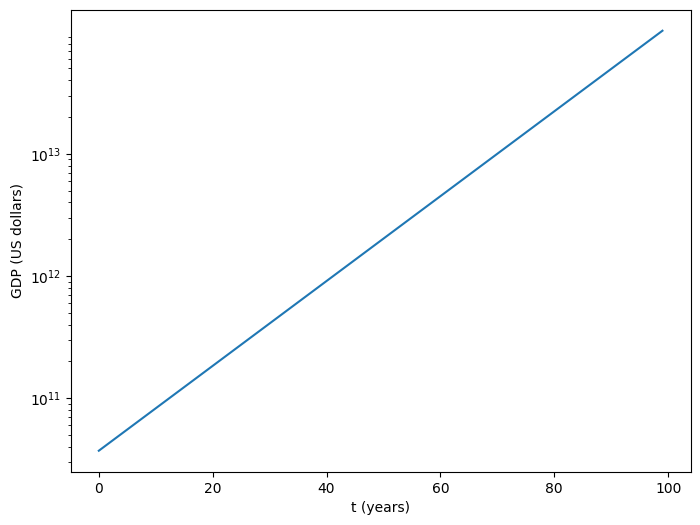

In [35]:
india_gdp_exp = exponential_function(xo = 3.702988e+10, a = 0.08, t = time)
print(f"GDP in 2047: {india_gdp_exp[87]/1e12} Trillion")
plt.figure(figsize=(8, 6))
plt.plot(time, india_gdp_exp)
plt.yscale('log')
plt.ylabel('GDP (US dollars)')
plt.xlabel('t (years)')
plt.yticks([1e11, 1e12, 1e13])
plt.show()